<a href="https://colab.research.google.com/github/SzuHannah/blending-stochastic/blob/main/Advopt_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install gurobipy

     |████████████████████████████████| 11.5 MB 6.0 MB/s 


In [2]:
import numpy as np
import gurobipy as grb
import scipy.stats as stat
from tqdm.notebook import trange
import matplotlib.pyplot as plt
plt.style.use('seaborn')

### one quality measure, two raw materials, and one product

### moreau envelope obj

In [30]:
#N_seq = [10, 50, 100, 400]; # number of samples
N_seq = [10, 50, 100, 500, 1000, 10000, 20000]; # numb of samples
M = 10; # numb of replication
Nprim = 1000;
alpha = 0.05;
eps = 0.001;
# feasible region of Qx-b
lb = 0
ub = 10.21
seq = np.zeros(len(N_seq));
me_seq = np.zeros(len(N_seq)); 
ci_up_seq = np.zeros(len(N_seq));
ci_low_seq = np.zeros(len(N_seq));
ci= np.zeros(len(N_seq));

x_id = [1,2]
for s in range(len(N_seq)):
    N = N_seq[s];
    print("######################## Sample size (", N, ") ########################");
    obj = np.zeros(M);
    #UB_obj = np.zeros(M);
    
    # M replication experiments
    for rep_m in trange(M):
        # lower bound ###############################################################################
        # N independent parameter samples
        e1 = np.random.uniform(16.768,16.982,N) ;
        e2 = np.random.uniform(14.540,15.656, N)
        exp = 0; # each replication
        mu = 1 # control step size

        # model
        model = grb.Model('SAA_mor', env = e);
        model.setParam('OutputFlag', 0)
        
        # variables
        x = {}
        # for k in x_id:
        for j in range(N):
          x[1,j] = model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (1,j))
          x[2,j] = model.addVar(lb=0,ub=0.60,name="x(%s_%s)" % (2,j))

        model.update()

        # Define Objective & constraints
        for k in range(N):
          t = model.addVar()
          model.addConstr(t == e1[k]*x[1,k]+e2[k]*x[2,k]-5.75)

          ##Projection of Qx-b to [0,ub]: min{max{Qx-b,lb},ub}
          #max (Qx,lb+b) = u
          u = model.addVar()
          model.addGenConstrMax(u,[t],lb)


          #min (u, ub) = v
          v = model.addVar()
          model.addGenConstrMin(v,[u],ub)

          ## minimize distance of current Qx-b to projection
          d = model.addVar()
          model.addConstr(d == ((t-v)**2)/2)

          model.addConstr(69.97 * x[1,k] + 56.80 * x[2,k] <= 100)
          model.addConstr(x[1,k] + x[2,k] >= 0.3)

        ds = model.getVars()
        model.setObjective(grb.quicksum(ds)*1.0/N, grb.GRB.MINIMIZE)

        model.setParam('NonConvex', 2)
        model.optimize()

        xval ={}
        for i,xv in enumerate(x_id):
            xval[xv] = model.getAttr('x', x).values()[i];
        exp = model.objVal;
        obj[rep_m] = exp;
        print(xval)

    seq[s] = sum(obj)*1.0/M;
    print("Moreau Bound = ", seq[s]);
    var = sum([np.square(obj[k]-seq[s]) for k in range(M)]) *1.0/(M-1);
    print("Moreau Bound Variance = ", var);
    # marginal error
    me = (stat.norm.ppf(1-alpha)*np.power(var,1/2))*1.0/(np.power(M,1)/2);
    ci[s] = me
    ci_up_seq[s]  = seq[s] + me;
    ci_low_seq[s] = seq[s] - me;
    print("CI of Moreau Bound = [", ci_low_seq[s]," , ", ci_up_seq[s],"]");


######################## Sample size ( 10 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0025493139017270794}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3397084337027955, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0007396502857166531}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33887627322466973, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33943163020555833, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3397410395520851, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3388806709801301, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.001451744846500791}
Aca

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0020406259625871392}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.00033239042465438295}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0030044498621286664}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33942055114683073, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0032222946222761895}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0011518645957073748}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33918159223494815, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0021444110

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0015316842923667195}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.000270208731386945}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3395013963926657, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33950299703235554, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0027724854194284276}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33896091137215484, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0021341660842092436}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0001548783259324

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.003268517570125584}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.00042937643119589364}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0025967482903110906}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.002236306265411492}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33880779846494485, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0019451204460972926}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.002758135371655368}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0011751290

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3390248138318476, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.001687193140456289}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0005534202669108534}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0018190385642041784}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 3.5558887983976213e-05}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33999178633736343, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0018381141297462156}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.002078998812

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.003021431664509966}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33865575473561155, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33957759382884717, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33929557923186304, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3393365130326428, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33980151166554085, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0004423026330464541}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3391774344079976, 2: 0.0}
Acade

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.00029337354388880854}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0011161639072896357}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33991848683293735, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0010415260768354972}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0005451516502106291}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.000907804347874186}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33960004952454176, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.00167398230

#### CI plot

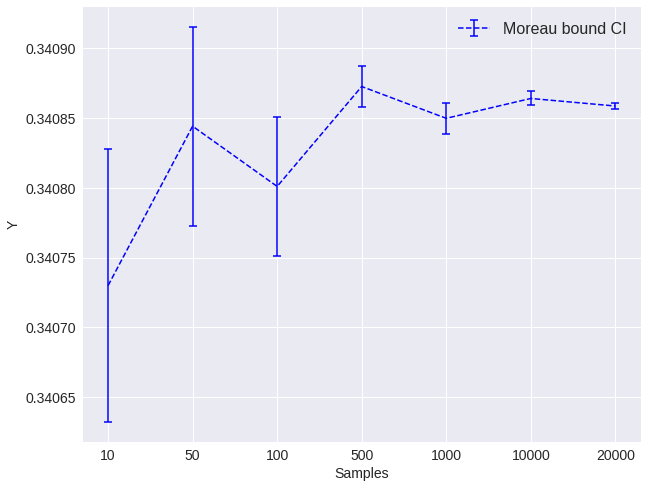

In [31]:
fig =  plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('Samples', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
# ax.axis([0, 5, 0, 35])
linestyle = {"linestyle":"--", "linewidth":1.5, "markeredgewidth":1.5, "elinewidth":1.5, "capsize":4}
# ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], UB_seq, yerr = UB_ci, color="r", **linestyle)
ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], seq, yerr = ci, color="b", **linestyle)
#ax.legend(['Upper bound CI','Lower bound CI'], fontsize  = 16)
ax.legend(['Moreau bound CI'], fontsize  = 16)
plt.show()

### cVAR obj

In [32]:
#N_seq = [10, 50, 100, 400]; # number of samples
N_seq = [10, 50, 100, 200, 500, 1000, 10000, 20000]; # numb of samples
M = 10; # numb of replication
Nprim = 1000;
alpha = 0.05;
eps = 0.001;

cv_seq = np.zeros(len(N_seq));
cv_me_seq = np.zeros(len(N_seq)); 
cv_ci_up_seq = np.zeros(len(N_seq));
cv_ci_low_seq = np.zeros(len(N_seq));
cv_ci= np.zeros(len(N_seq));

x_id = [1,2]
for s in range(len(N_seq)):
    N = N_seq[s];
    print("######################## Sample size (", N, ") ########################");
    cv_obj = np.zeros(M);
    UB_obj = np.zeros(M);
    
    # M replication experiments
    for rep_m in trange(M):
        # lower bound ###############################################################################
        # N independent parameter samples
        e1 = np.random.uniform(16.768,16.982,N) ;
        e2 = np.random.uniform(14.540,15.656, N)
        cv_exp = 0; # each replication
        
        # model
        cv_model = grb.Model('SAA_cv', env = e);
        cv_model.setParam('OutputFlag', 0)
        
        # variables
        x = {}
        # for k in x_id:
        for j in range(N):
          x[1,j] = cv_model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (1,j))
          x[2,j] = cv_model.addVar(lb=0,ub=0.60,name="x(%s_%s)" % (2,j))

        cv_model.update()

        # Define Objective & constraints
        for k in range(N):
          t = cv_model.addVar()
          cv_model.addConstr(t == e1[k]*x[1,k]+e2[k]*x[2,k]-5.75+eps)

          #max
          u = cv_model.addVar()
          cv_model.addGenConstrMax(u,[t],0)
          ue = cv_model.addVar()
          cv_model.addConstr(ue == u/eps)

          cv_model.addConstr(69.97 * x[1,k] + 56.80 * x[2,k] <= 100)
          cv_model.addConstr(x[1,k] + x[2,k] >= 0.3)
        ues = cv_model.getVars()
        cv_model.setObjective(grb.quicksum(ues)*1.0/N, grb.GRB.MINIMIZE)

        cv_model.optimize()
        xval ={}
        for i,xv in enumerate(x_id):
            xval[xv] = cv_model.getAttr('x', x).values()[i];
        cv_exp = cv_model.objVal;
        cv_obj[rep_m] = cv_exp;
        print(xval)

    cv_seq[s] = sum(cv_obj)*1.0/M;
    print("cVAR Bound = ", cv_seq[s]);
    cv_var = sum([np.square(cv_obj[k]-cv_seq[s]) for k in range(M)]) *1.0/(M-1);
    print("cVAR Bound Variance = ", cv_var);
    # marginal error
    cv_me = (stat.norm.ppf(1-alpha)*np.power(cv_var,1/2))*1.0/(np.power(M,1)/2);
    cv_ci[s] = cv_me
    cv_ci_up_seq[s]  = cv_seq[s] + cv_me;
    cv_ci_low_seq[s] = cv_seq[s] - cv_me;
    print("CI of cVAR Bound = [", cv_ci_low_seq[s]," , ", cv_ci_up_seq[s],"]");


######################## Sample size ( 10 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3390963083486395, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0023226027123547377}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0008727892362312015}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0010431207066675663}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0017885021350320107}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3391741606143145, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.00053972895213356}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33880913493866766, 2: 0.

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.00015315202634440174}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3386544575125609, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 5.884517529045159e-05}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33967698770266397, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33995402124592333, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0027291812297258744}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33927760152469855, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.00059751635824589

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0005762843852713278}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0023176565870450805}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3388773511320618, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3386008437221096, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.002461279477820155}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33951835989950935, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0007705199660672919}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33911677000812307, 2: 0.0}

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.001262025203738082}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0011924191887426883}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3397343642517629, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3398172279111944, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3389602349852259, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 7.041693470466e-05}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3390226646029504, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3390263501701251, 2: 0.0}
Academic

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.002677475159215237}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0008992299862041884}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.000412437488668824}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.002211840282155486}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33963606860644613, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0030331981283461262}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0030565382546632325}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.00221544196

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0026865049543850494}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 4.003326091778299e-05}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.003150018891379336}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0020134354993368575}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3396829911193784, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3392406717954973, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33952119152249643, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.00305511060114205

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.002667125091876832}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0006525078618460923}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.338783598035603, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0019866725710537825}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33944360851408345, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0015138054894312525}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.002689512274677952}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3396471397186371, 2: 0.0

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0008262708539029065}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0007187802477727911}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33907833837397944, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33971793646606807, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0022444026537630224}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.00017070191457670567}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.001072405969456347}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.00056964215

#### CI plot

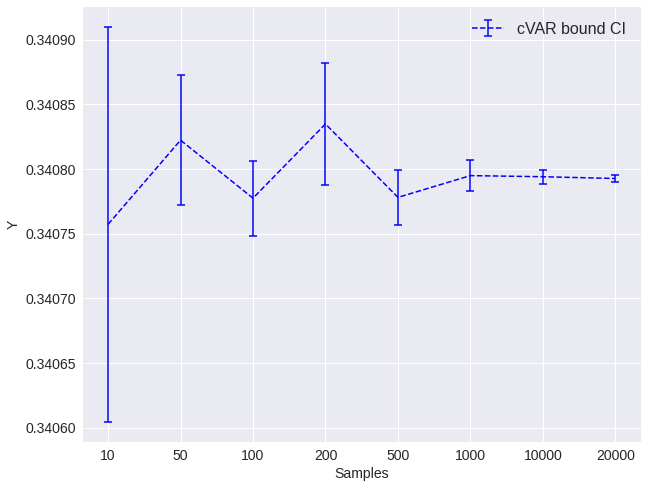

In [33]:
fig =  plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('Samples', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
# ax.axis([0, 5, 0, 35])
linestyle = {"linestyle":"--", "linewidth":1.5, "markeredgewidth":1.5, "elinewidth":1.5, "capsize":4}
# ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], UB_seq, yerr = UB_ci, color="r", **linestyle)
ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], cv_seq, yerr = cv_ci, color="b", **linestyle)
ax.legend(['cVAR bound CI'], fontsize  = 16)
plt.show()

## One quality measure, 7 materials 1 product

### cVAR obj

In [37]:
#N_seq = [10, 50, 100]; # number of samples
N_seq = [10, 50, 100, 200, 500, 1000, 10000]; # numb of samples
M = 10; # numb of replication
Nprim = 1000;
alpha = 0.05;
eps = 0.0001;

LB_seq = np.zeros(len(N_seq));
LB_me_seq = np.zeros(len(N_seq)); 
LB_ci_up_seq = np.zeros(len(N_seq));
LB_ci_low_seq = np.zeros(len(N_seq));
LB_ci= np.zeros(len(N_seq));

x_id = [1,2,3,4,5,6,7]
for s in range(len(N_seq)):
    N = N_seq[s];
    print("######################## Sample size (", N, ") ########################");
    LB_obj = np.zeros(M);
    UB_obj = np.zeros(M);
    
    # M replication experiments
    for rep_m in trange(M):
        # lower bound ###############################################################################
        # N independent parameter samples
        e1 = np.random.uniform(16.768,16.982,N)
        e2 = np.random.uniform(14.540,15.656, N)
        e3 = np.random.uniform(15.232,17.202,N)
        e4 = np.random.uniform(15.232,17.202,N)
        e5 = np.random.uniform(15.160,17.892,N)
        e6 = np.random.uniform(14.510,17.648,N)
        e7 = np.random.uniform(10.250,13.680,N)
        LB_exp = 0; # each replication
        
        # model
        LB_model = grb.Model('SAA_LB',e);
        LB_model.setParam('OutputFlag', 0)
        
        # variables
        x = {}
        # for k in x_id:
        for j in range(N):
          x[1,j] = LB_model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (1,j))
          x[2,j] = LB_model.addVar(lb=0,ub=0.60,name="x(%s_%s)" % (2,j))
          x[3,j] = LB_model.addVar(lb=0,ub=0.11,name="x(%s_%s)" % (3,j))
          x[4,j] = LB_model.addVar(lb=0,ub=0.27,name="x(%s_%s)" % (4,j))
          x[5,j] = LB_model.addVar(lb=0,ub=0.25,name="x(%s_%s)" % (5,j))
          x[6,j] = LB_model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (6,j))
          x[7,j] = LB_model.addVar(lb=0,ub=0.099,name="x(%s_%s)" % (7,j))

        LB_model.update()

        # Define Objective & constraints
        for k in range(N):
          t = LB_model.addVar()
          LB_model.addConstr(t == e1[k]*x[1,k]+e2[k]*x[2,k]+e3[k]*x[3,k]+ e4[k]*x[4,k]+e5[k]*x[5,k]+e6[k]*x[6,k]+e7[k]*x[7,k]-5.75+eps)

          #max
          u = LB_model.addVar()
          LB_model.addGenConstrMax(u,[t],0)
          ue = LB_model.addVar()
          LB_model.addConstr(ue == u/eps)

          LB_model.addConstr(69.97 * x[1,k] + 56.80 * x[2,k] + 47.89 * (x[3,k] + x[4,k] + x[5,k]) + 54.22 * x[6,k] + 48.99 * x[7,k]<= 120, name = "constr1(%s)"%k)
          LB_model.addConstr(x[1,k]+x[2,k]+x[3,k]+x[4,k]+x[5,k]+x[6,k]+x[7,k]>= 0.3)

        ues = LB_model.getVars()
        LB_model.setObjective(grb.quicksum(ues) * 1/N, grb.GRB.MINIMIZE)

        LB_model.optimize()
        xval ={}
        for i,xv in enumerate(x_id):
            xval[xv] = LB_model.getAttr('x', x).values()[i];
        LB_exp = LB_model.objVal;
        LB_obj[rep_m] = LB_exp;
        print(xval)

    LB_seq[s] = sum(LB_obj)*1.0/M;
    print("Lower Bound = ", LB_seq[s]);
    LB_var = sum([np.square(LB_obj[k]-LB_seq[s]) for k in range(M)]) *1.0/(M-1);
    print("Lower Bound Variance = ", LB_var);
    # marginal error
    LB_me = (stat.norm.ppf(1-alpha)*np.power(LB_var,1/2))*1.0/(np.power(M,1)/2);
    LB_ci[s] = LB_me
    LB_ci_up_seq[s]  = LB_seq[s] + LB_me;
    LB_ci_low_seq[s] = LB_seq[s] - LB_me;
    print("CI of Lower Bound = [", LB_ci_low_seq[s]," , ", LB_ci_up_seq[s],"]");


######################## Sample size ( 10 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.32788921424348666, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.23009146065470779, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 6.766054673132058e-05, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.08697899649273146, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.001026770614767281, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.0, 6: 0.22558024106075739, 7: 0.0}
Academic

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0862506155312789, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.08251588811270885, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3391486034085619, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.3322725905693409, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.3388168741356738, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.00016027737175286226, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
Academic licen

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.08627629508604148, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.08824445907471386, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.00012483460241472855, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.000561115872500981, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.27, 5: 0.0, 6: 0.06502534164983939, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0005701410667921844, 6: 0.0, 7: 0.0}
Acad

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.00036343317636284894, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.07104194671669685, 2: 0.0, 3: 0.0, 4: 0.27, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0002397700146198111, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.06785624279547325, 2: 0.0, 3: 0.0, 4: 0.27, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0845398897424315, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.32824872410186906, 7: 0.0}
Academi

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.27, 5: 0.0, 6: 0.0658513600690222, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.0, 6: 0.22778233176608365, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0004740953259924652, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.06707643295174447, 2: 0.0, 3: 0.0, 4: 0.27, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.27, 5: 0.0, 6: 0.06857643274422828, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0002986911009385088, 5: 0.0, 6: 0.0, 7: 0.0}
Academi

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.3321508701202753, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.06755392772910304, 2: 0.0, 3: 0.0, 4: 0.27, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.07445285620924579, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0007113884062352806, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.08051947986062029, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.3375644268704941, 7: 0.0}
Academic lic

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0888709946727959, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3391961779374981, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33960330176132825, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.33595207365850194, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0008886029258282175, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.08546857235492812, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic lice

#### CI plot

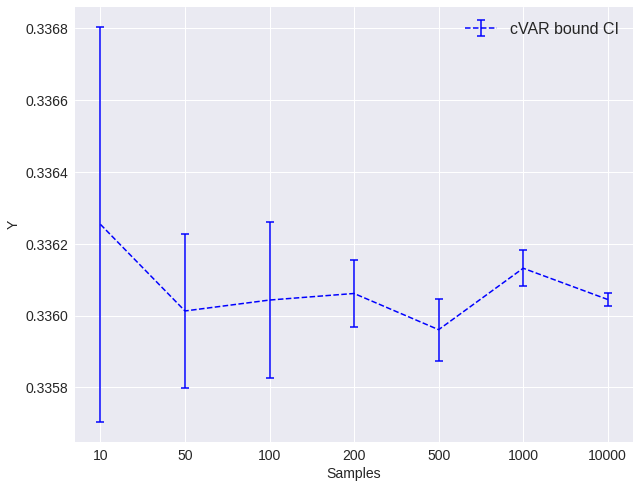

In [39]:
fig =  plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('Samples', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
# ax.axis([0, 5, 0, 35])
linestyle = {"linestyle":"--", "linewidth":1.5, "markeredgewidth":1.5, "elinewidth":1.5, "capsize":4}
ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], LB_seq, yerr = LB_ci, color="b", **linestyle)
ax.legend(['cVAR bound CI'], fontsize  = 16)
plt.show()

## One quality measure, 7 materials, two products with different thermal requirement

### Moreau obj.

In [ ]:
#N_seq = [10, 50, 100, 400]; # number of samples
N_seq = [10, 50, 100, 500, 1000, 10000]; # numb of samples
M = 10; # numb of replication
alpha = 0.05;
# feasible region of Qx-b
lb = 0
ub = 10.21
seq = np.zeros(len(N_seq));
me_seq = np.zeros(len(N_seq)); 
ci_up_seq = np.zeros(len(N_seq));
ci_low_seq = np.zeros(len(N_seq));
ci= np.zeros(len(N_seq));

x_id = [1,2]
for s in range(len(N_seq)):
    N = N_seq[s];
    print("######################## Sample size (", N, ") ########################");
    obj = np.zeros(M);
    #UB_obj = np.zeros(M);
    
    # M replication experiments
    for rep_m in trange(M):
        # lower bound ###############################################################################
        # N independent parameter samples
        e1 = np.random.uniform(16.768,16.982,N) ;
        e2 = np.random.uniform(14.540,15.656, N)
        exp = 0; # each replication
        mu = 1 # control step size

        # model
        model = grb.Model('SAA_mor', env = e);
        model.setParam('OutputFlag', 0)
        
        # variables
        x = {}
        # for k in x_id:
        for j in range(N):
          x[1,j] = model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (1,j))
          x[2,j] = model.addVar(lb=0,ub=0.60,name="x(%s_%s)" % (2,j))

        model.update()

        # Define Objective & constraints
        for k in range(N):
          t = model.addVar()
          model.addConstr(t == e1[k]*x[1,k]+e2[k]*x[2,k]-5.75)

          ##Projection of Qx-b to [0,ub]: min{max{Qx-b,lb},ub}
          #max (Qx,lb+b) = u
          u = model.addVar()
          model.addGenConstrMax(u,[t],lb)


          #min (u, ub) = v
          v = model.addVar()
          model.addGenConstrMin(v,[u],ub)

          ## minimize distance of current Qx-b to projection
          d = model.addVar()
          model.addConstr(d == ((t-v)**2)*mu/2)

          model.addConstr(69.97 * x[1,k] + 56.80 * x[2,k] <= 100)
          model.addConstr(x[1,k] + x[2,k] >= 0.3)

        ds = model.getVars()
        model.setObjective(grb.quicksum(ds)*1.0/N, grb.GRB.MINIMIZE)

        model.setParam('NonConvex', 2)
        model.optimize()

        xval ={}
        for i,xv in enumerate(x_id):
            xval[xv] = model.getAttr('x', x).values()[i];
        exp = model.objVal;
        obj[rep_m] = exp;
        print(xval)

    seq[s] = sum(obj)*1.0/M;
    print("Moreau Bound = ", seq[s]);
    var = sum([np.square(obj[k]-seq[s]) for k in range(M)]) *1.0/(M-1);
    print("Moreau Bound Variance = ", var);
    # marginal error
    me = (stat.norm.ppf(1-alpha)*np.power(var,1/2))*1.0/(np.power(M,1)/2);
    ci[s] = me
    ci_up_seq[s]  = seq[s] + me;
    ci_low_seq[s] = seq[s] - me;
    print("CI of Moreau Bound = [", ci_low_seq[s]," , ", ci_up_seq[s],"]");


### cVAR obj

In [44]:
#N_seq = [10, 50, 100]; # number of samples
N_seq = [10, 50, 100, 200, 500, 1000, 10000]; # numb of samples
M = 10; # numb of replication
Nprim = 1000;
alpha = 0.05;
eps = 0.0001;

LB_seq = np.zeros(len(N_seq));
LB_me_seq = np.zeros(len(N_seq)); 
LB_ci_up_seq = np.zeros(len(N_seq));
LB_ci_low_seq = np.zeros(len(N_seq));
LB_ci= np.zeros(len(N_seq));

x_id = [1,2,3,4,5,6,7]
y_id = [1,2,3,4,5,6,7]
for s in range(len(N_seq)):
    N = N_seq[s];
    print("######################## Sample size (", N, ") ########################");
    LB_obj = np.zeros(M);
    UB_obj = np.zeros(M);
    
    # M replication experiments
    for rep_m in trange(M):
        # lower bound ###############################################################################
        # N independent parameter samples
        e1 = np.random.uniform(16.768,16.982,N)
        e2 = np.random.uniform(14.540,15.656, N)
        e3 = np.random.uniform(15.232,17.202,N)
        e4 = np.random.uniform(15.232,17.202,N)
        e5 = np.random.uniform(15.160,17.892,N)
        e6 = np.random.uniform(14.510,17.648,N)
        e7 = np.random.uniform(10.250,13.680,N)
        LB_exp = 0; # each replication
        
        # model
        LB_model = grb.Model('SAA_LB',e);
        LB_model.setParam('OutputFlag', 0)
        
        # variables
        x = {}
        y = {}
        # for k in x_id:
        for j in range(N):
          x[1,j] = LB_model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (1,j))
          x[2,j] = LB_model.addVar(lb=0,ub=0.60,name="x(%s_%s)" % (2,j))
          x[3,j] = LB_model.addVar(lb=0,ub=0.11,name="x(%s_%s)" % (3,j))
          x[4,j] = LB_model.addVar(lb=0,ub=0.27,name="x(%s_%s)" % (4,j))
          x[5,j] = LB_model.addVar(lb=0,ub=0.25,name="x(%s_%s)" % (5,j))
          x[6,j] = LB_model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (6,j))
          x[7,j] = LB_model.addVar(lb=0,ub=0.099,name="x(%s_%s)" % (7,j))

          y[1,j] = LB_model.addVar(lb=0,ub=0.34,name="y(%s_%s)" % (1,j))
          y[2,j] = LB_model.addVar(lb=0,ub=0.60,name="y(%s_%s)" % (2,j))
          y[3,j] = LB_model.addVar(lb=0,ub=0.11,name="y(%s_%s)" % (3,j))
          y[4,j] = LB_model.addVar(lb=0,ub=0.27,name="y(%s_%s)" % (4,j))
          y[5,j] = LB_model.addVar(lb=0,ub=0.25,name="y(%s_%s)" % (5,j))
          y[6,j] = LB_model.addVar(lb=0,ub=0.34,name="y(%s_%s)" % (6,j))
          y[7,j] = LB_model.addVar(lb=0,ub=0.099,name="y(%s_%s)" % (7,j))

        LB_model.update()

        # Define Objective & constraints
        for k in range(N):
          t1 = LB_model.addVar()
          LB_model.addConstr(t1 == e1[k]*x[1,k]+e2[k]*x[2,k]+e3[k]*x[3,k]+ e4[k]*x[4,k]+e5[k]*x[5,k]+e6[k]*x[6,k]+e7[k]*x[7,k]-5.75+eps)
          t2 = LB_model.addVar()
          LB_model.addConstr(t1 == e1[k]*y[1,k]+e2[k]*y[2,k]+e3[k]*y[3,k]+ e4[k]*y[4,k]+e5[k]*y[5,k]+e6[k]*y[6,k]+e7[k]*y[7,k]-7.677+eps)

          #max
          u = LB_model.addVar()
          LB_model.addGenConstrMax(u,[t1,t2],0)
          ue = LB_model.addVar()
          LB_model.addConstr(ue == u/eps)

          LB_model.addConstr(69.97 * (x[1,k]+y[1,k]) + 56.80 * (x[2,k]+y[2,k]) + 47.89 * (x[3,k]+y[3,k] + x[4,k]+y[4,k] + x[5,k]+y[5,k]) + 54.22 * (x[6,k]+y[6,k]) + 48.99 * (x[7,k]+y[7,k])<= 120, name = "constr1(%s)"%k)
          LB_model.addConstr(x[1,k]+y[1,k]+x[2,k]+y[2,k]+x[3,k]+y[3,k]+x[4,k]+y[4,k]+x[5,k]+y[5,k]+x[6,k]+y[6,k]+x[7,k]+y[7,k]>= 0.3)

        ues = LB_model.getVars()
        LB_model.setObjective(grb.quicksum(ues) * 1/N, grb.GRB.MINIMIZE)

        LB_model.optimize()
        xval ={}
        for i,xv in enumerate(x_id):
            xval[xv] = LB_model.getAttr('x', x).values()[i];

        yval ={}
        for i,yv in enumerate(y_id):
            yval[yv] = LB_model.getAttr('x', y).values()[i];

        LB_exp = LB_model.objVal;
        LB_obj[rep_m] = LB_exp;
        print(xval)
        print(yval)

    LB_seq[s] = sum(LB_obj)*1.0/M;
    print("Lower Bound = ", LB_seq[s]);
    LB_var = sum([np.square(LB_obj[k]-LB_seq[s]) for k in range(M)]) *1.0/(M-1);
    print("Lower Bound Variance = ", LB_var);
    # marginal error
    LB_me = (stat.norm.ppf(1-alpha)*np.power(LB_var,1/2))*1.0/(np.power(M,1)/2);
    LB_ci[s] = LB_me
    LB_ci_up_seq[s]  = LB_seq[s] + LB_me;
    LB_ci_low_seq[s] = LB_seq[s] - LB_me;
    print("CI of Lower Bound = [", LB_ci_low_seq[s]," , ", LB_ci_up_seq[s],"]");


######################## Sample size ( 10 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0004620548749187051, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.11486701981689099, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3388839217816299, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.11635463248522192, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.3278939454213258, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.10121426435917805, 5: 0.0, 6: 0.34, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.00041187388356165986, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.11786055697579778, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use o

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0798359844572447, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
{1: 0.19353190444446647, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.07085873422048632, 2: 0.0, 3: 0.0, 4: 0.27, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.18531310957948102, 2: 0.0, 3: 0.0, 4: 0.27, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0001005906888240683, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.010297023304847044, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0005323410227684101, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.006209774863746908, 6: 0.0, 7: 0.0}
Academic license - for non-commercial

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.002035963218511081, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.12083636548690807, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.33263119383374873, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.10610271800607858, 4: 0.0, 5: 0.0, 6: 0.34, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.22776413760242675, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.001398677022907858, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.23206843008462955, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.0, 6: 0.006868554345971487, 7: 0.0}
Academic license - for non-commercial us

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.08483497731994662, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
{1: 0.19893367056755112, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.08627474823168599, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
{1: 0.19981359163832443, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.23082248179916515, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.0, 6: 0.005497431332915655, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0010901901034994254, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.12449734675732332, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial us

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0006947507635632661, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.0, 6: 0.006693923299416322, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33897833962559876, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.1133066309403029, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.08192707788585926, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.19450110717362432, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.002346791688983879, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.11723488689965123, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.00030092780275932233, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.11867044306004372, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.08327064780275295, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
{1: 0.196872210283027, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3389866860111434, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.11565104232845572, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3398959459057323, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.11521932114670329, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only 

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.32587498968538947, 7: 0.0}
{1: 0.09998105859479896, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.34, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.23000526497900917, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.11, 4: 0.0048122398376599235, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0772004000409007, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.1879218227753529, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.23057003604986362, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.0, 6: 0.00526243841304345, 7: 0.0}
Academic license - for non-commercial use o

### CI plot

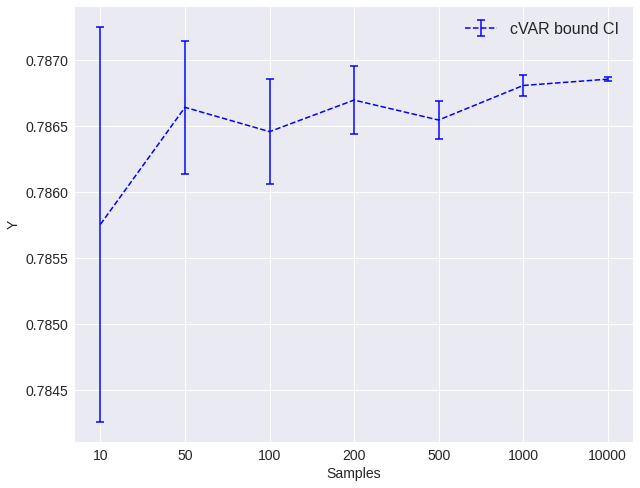

In [45]:
fig =  plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('Samples', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
# ax.axis([0, 5, 0, 35])
linestyle = {"linestyle":"--", "linewidth":1.5, "markeredgewidth":1.5, "elinewidth":1.5, "capsize":4}
ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], LB_seq, yerr = LB_ci, color="b", **linestyle)
ax.legend(['cVAR bound CI'], fontsize  = 16)
plt.show()

### ash content, thermal content
easily exceed free-licence limit if use cvaR obj.

In [ ]:
N_seq = [10, 20, 30]; # number of samples
#N_seq = [10 50 100 200 500 1000]; # numb of samples
M = 10; # numb of replication
alpha = 0.05;
eps = 0.01;

LB_seq = np.zeros(len(N_seq));
LB_me_seq = np.zeros(len(N_seq)); 
LB_ci_up_seq = np.zeros(len(N_seq));
LB_ci_low_seq = np.zeros(len(N_seq));
LB_ci= np.zeros(len(N_seq));

x_id = [1,2]
for s in range(len(N_seq)):
    N = N_seq[s];
    print("######################## Sample size (", N, ") ########################");
    LB_obj = np.zeros(M);
    UB_obj = np.zeros(M);
    
    # M replication experiments
    for rep_m in trange(M):
        # lower bound ###############################################################################
        # N independent parameter samples
        e1t = np.random.uniform(16.768,16.982,N)
        e2t = np.random.uniform(14.540,15.656, N)
        e1a = np.random.uniform(0.30,0.75,N)
        e2a = np.random.uniform(0.1,1.13,N)
        LB_exp = 0; # each replication
        
        # model
        LB_model = grb.Model('SAA_LB');
        LB_model.setParam('OutputFlag', 0)
        
        # variables
        x = {}
        # for k in x_id:
        for j in range(N):
          x[1,j] = LB_model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (1,j))
          x[2,j] = LB_model.addVar(lb=0,ub=0.60,name="x(%s_%s)" % (2,j))


        LB_model.update()

        # Define Objective & constraints
        for k in range(N):
          t = LB_model.addVar()
          a = LB_model.addVar()
          LB_model.addConstr(t == e1t[k]*x[1,k]+e2t[k]*x[2,k]-5.75+eps)
          LB_model.addConstr(a== (1-e1a[k])*x[1,k]+(1-e2a[k])*x[2,k] + eps)

          #max
          u = LB_model.addVar()
          LB_model.addGenConstrMax(u,[t],0)
          ue = LB_model.addVar()
          LB_model.addConstr(ue == u/eps)
          v = LB_model.addVar()
          LB_model.addGenConstrMax(v,[a],0)
          ve = LB_model.addVar()
          LB_model.addConstr(ve == v/eps)

          LB_model.addConstr(69.97 * x[1,k] + 56.80 * x[2,k]<= 50, name = "constr1(%s)"%k)
          LB_model.addConstr(x[1,k]+x[2,k]>= 0.3)

        ues = LB_model.getVars()
        ves = LB_model.getVars()
        LB_model.setObjective(grb.quicksum( ues + ves)*1.0/N, grb.GRB.MAXIMIZE)
        LB_model.setParam('NonConvex', 2)

        LB_model.optimize()
        xval ={}
        for i,xv in enumerate(x_id):
            xval[xv] = LB_model.getAttr('x', x).values()[i];
        LB_exp = LB_model.objVal;
        LB_obj[rep_m] = LB_exp;
        print(xval)

    LB_seq[s] = sum(LB_obj)*1.0/M;
    print("Lower Bound = ", LB_seq[s]);
    LB_var = sum([np.square(LB_obj[k]-LB_seq[s]) for k in range(M)]) *1.0/(M-1);
    print("Lower Bound Variance = ", LB_var);
    # marginal error
    LB_me = (stat.norm.ppf(1-alpha)*np.power(LB_var,1/2))*1.0/(np.power(M,1)/2);
    LB_ci[s] = LB_me
    LB_ci_up_seq[s]  = LB_seq[s] + LB_me;
    LB_ci_low_seq[s] = LB_seq[s] - LB_me;
    print("CI of Lower Bound = [", LB_ci_low_seq[s]," , ", LB_ci_up_seq[s],"]");


######################## Sample size ( 10 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
Lower Bound =  1.6550521652136632
Lower Bound Variance =  0.0
CI of Lower Bound = [ 1.6550521652136632  ,  1.6550521652136632 ]
######################## Sample size ( 20 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
Lower Bound =  1.6550521652136632
Lower Bound Variance =  0.0
CI of Lower Bound = [ 1.6550521652136632  ,  1.6550521652136632 ]
######################## Sample size ( 30 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.22752608260683155, 2: 0.6}
{1: 0.22752608260683155, 2: 0.6}
{1: 0.22752608260683155, 2: 0.6}
{1: 0.22752608260683155, 2: 0.6}
{1: 0.22752608260683155, 2: 0.6}
{1: 0.22752608260683155, 2: 0.6}
{1: 0.22752608260683155, 2: 0.6}
{1: 0.22752608260683155, 2: 0.6}
{1: 0.22752608260683155, 2: 0.6}
{1: 0.22752608260683155, 2: 0.6}
Lower Bound =  1.6550521652136632
Lower Bound Variance =  0.0
CI of Lower Bound = [ 1.6550521652136632  ,  1.6550521652136632 ]


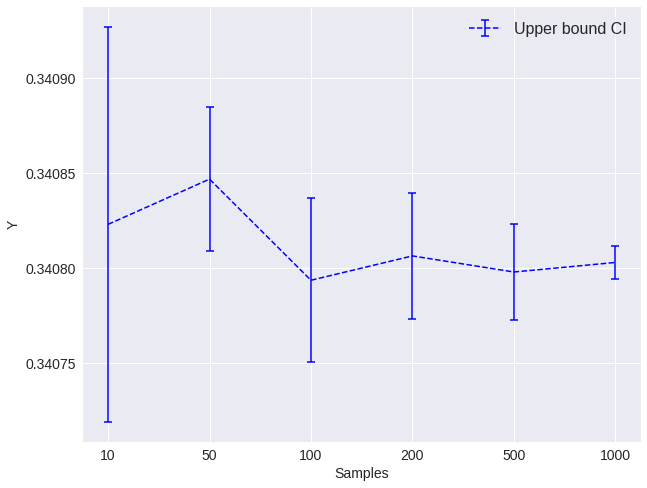

In [12]:
e = grb.Env(empty=True)
e.setParam('WLSACCESSID', '131fb46b-840e-4bdd-b247-328a0ea76dc1')
e.setParam('WLSSECRET', 'ae3c256c-b280-400a-8287-ecf96c8ddf8e')
e.setParam('LICENSEID', 801091)
e.start()

# Create the model within the Gurobi environment
model = grb.Model(env=e)

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
